# Description
Hello, My name is Ihsan.<br>
I graduated from university this year. I improve myself on the topic of machine learning and Data science. This notebook is my third notebook. I will write about the Logistic regression model. I will apply the Logistic Regression of the classification part from machine learning in this notebook. My goal is to learn to use Logistic Regression on datasets. I am learning new and I may be don't know things. If Help me in comments I will be happy so much. I will be waiting for your comments.<br>

[For a detailed description of the dataset, please click here](https://www.kaggle.com/datasets/adityakadiwal/water-potability)

Other my notebook:
- [GPU Search](https://www.kaggle.com/code/ihsncnkz/gpu-search)
- [EDA And Linear Regression](https://www.kaggle.com/code/ihsncnkz/eda-and-linear-regression)
- [Regression Models](https://www.kaggle.com/code/ihsncnkz/regression-models)

# Contents
- [Dataset Review (EDA)](#1)
- [Logistic Regression](#2)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-potability/water_potability.csv


# Dataset Review (EDA)<a id="1"></a>

In [2]:
# Reading Date with Pandas Libs.
data = pd.read_csv("/kaggle/input/water-potability/water_potability.csv")

In [3]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [4]:
# I am looking to data top ten.
data.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [5]:
# I am looking to data tail ten.
data.tail(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [6]:
# İnformation of Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
# Dataset Values(Max, min, std...)
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
# Dataset Correlation: Relationship between columns
data.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


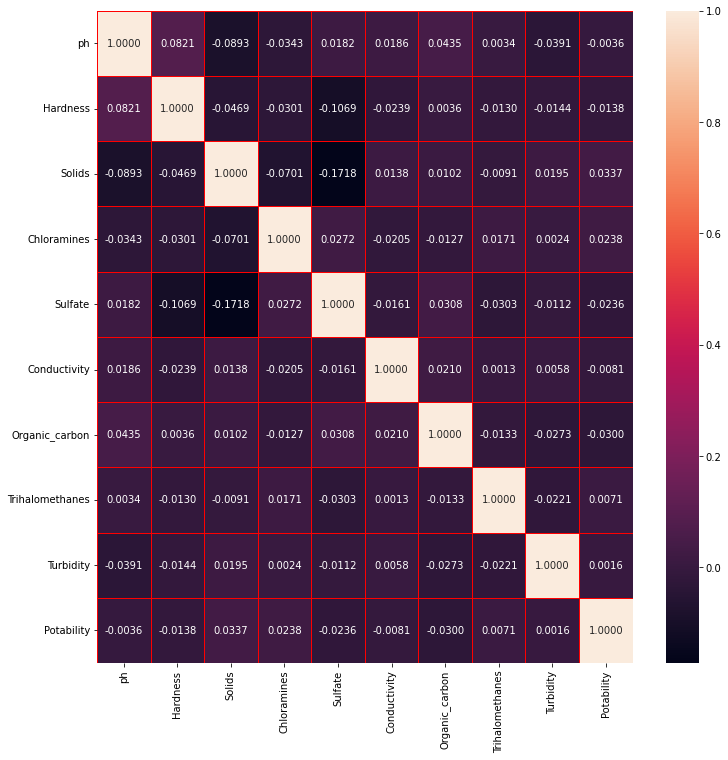

In [9]:
# Visualization of correlation result with seaborn library heatmap.
f, ax = plt.subplots(figsize = (12,12))
sns.heatmap(data.corr(), annot = True, linewidths = 0.5, linecolor = "red", fmt = ".4f", ax = ax )
plt.show()

<Figure size 864x864 with 0 Axes>

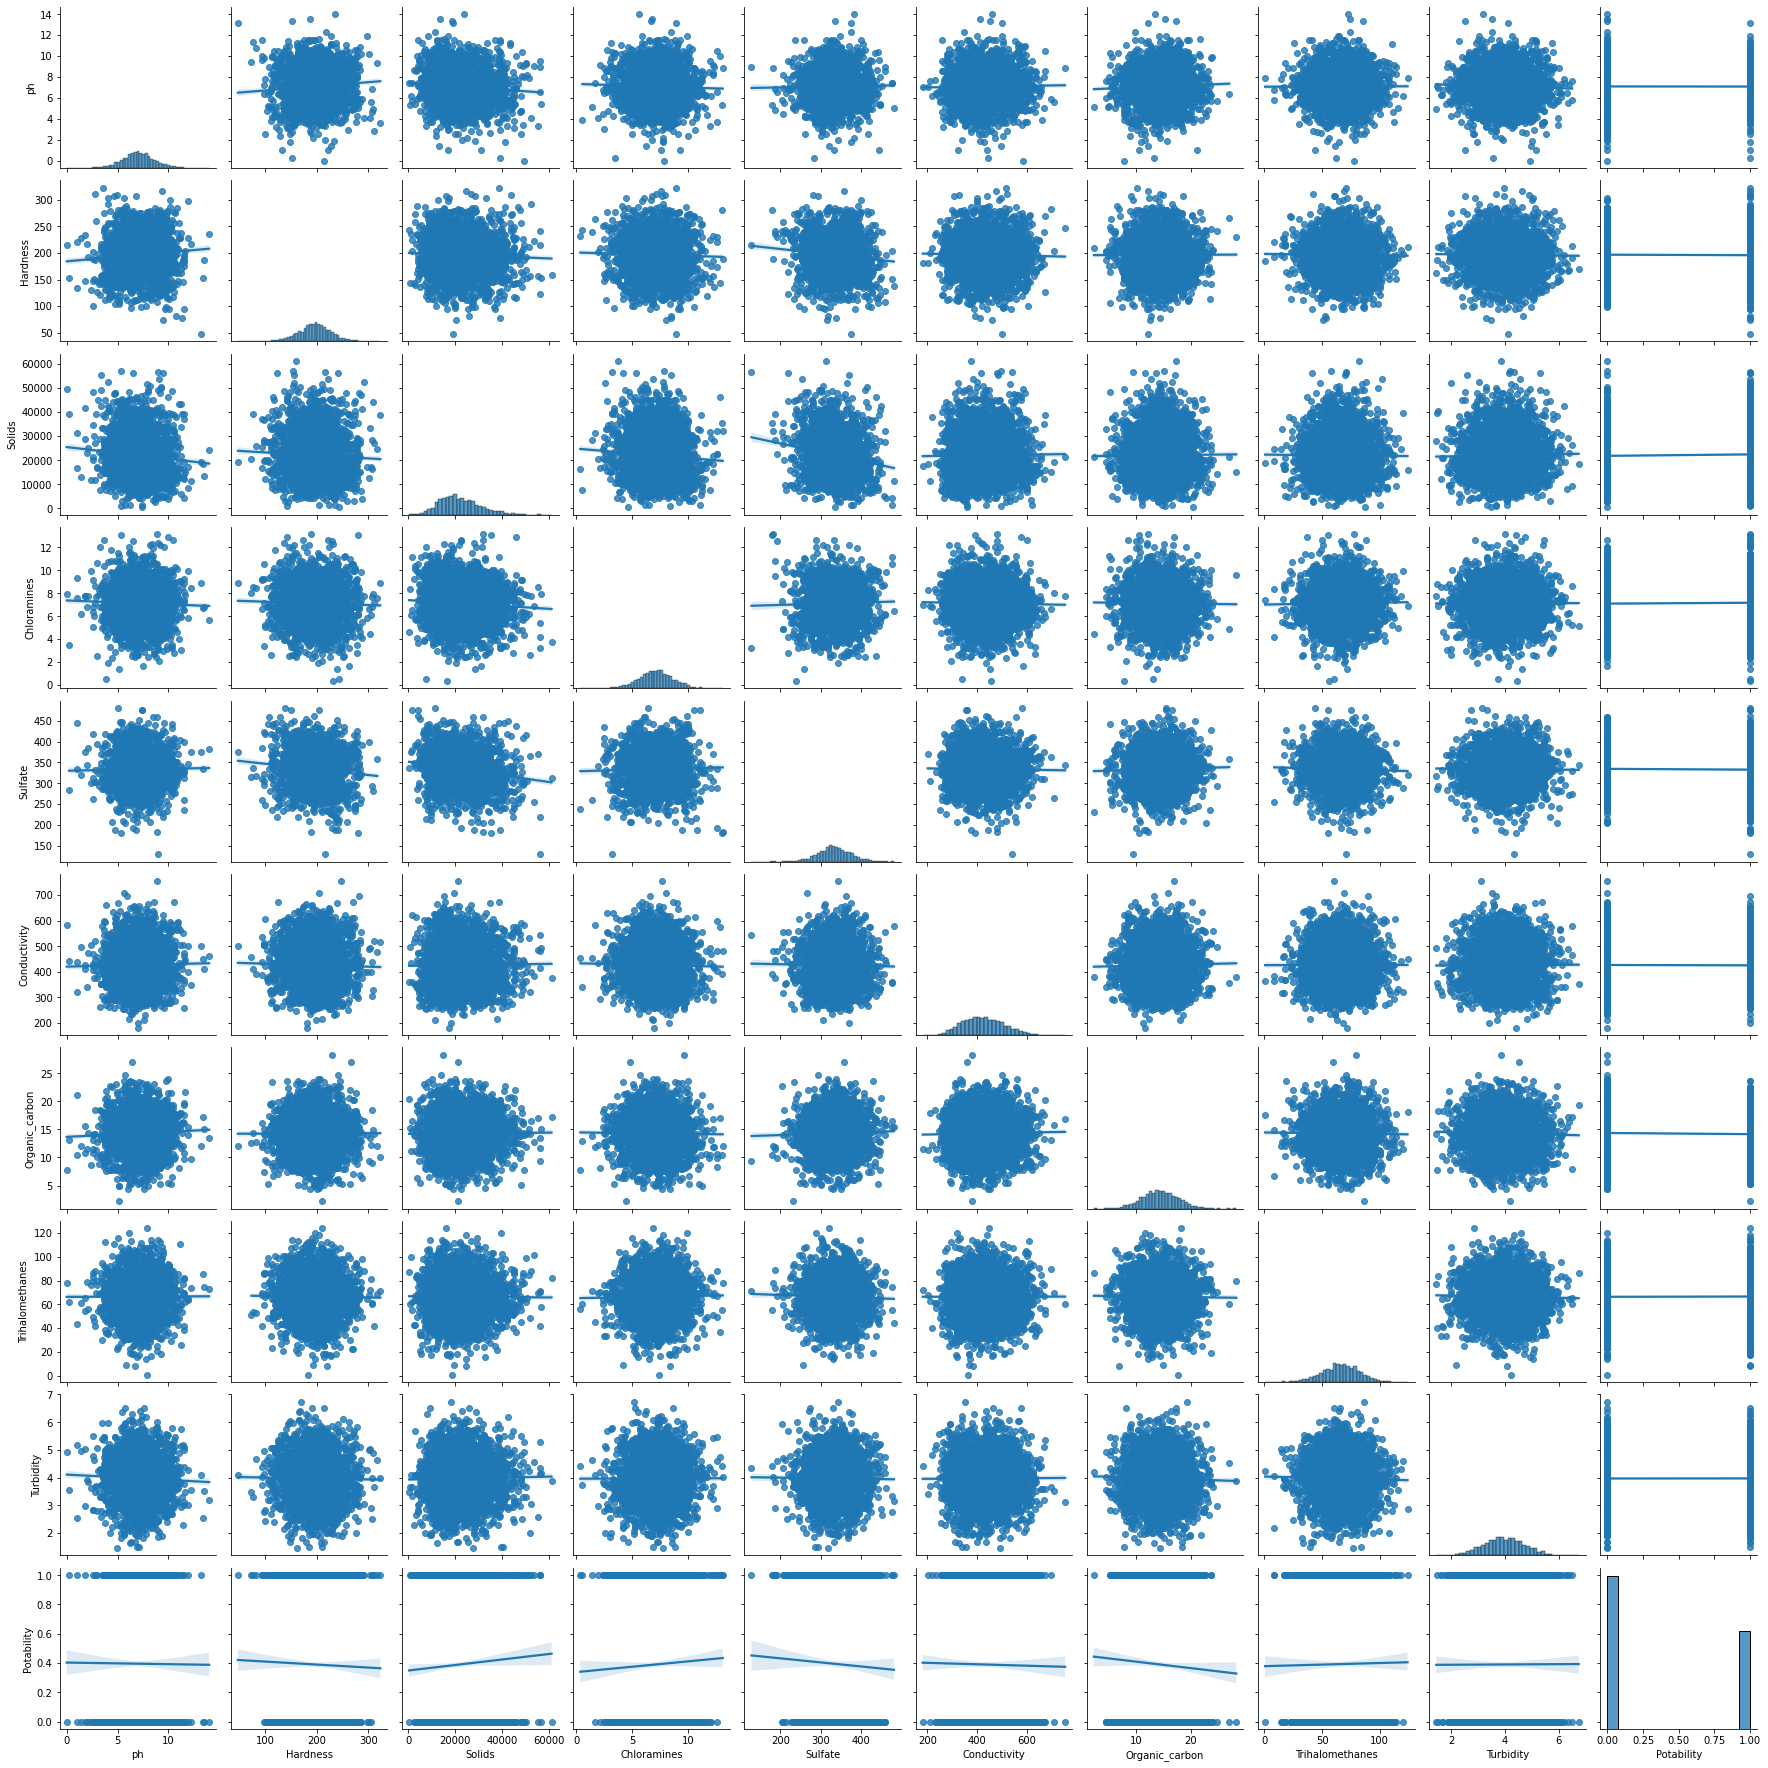

In [10]:
# Visualization of correlation results with Seaborn library pairplot.
plt.figure(figsize=(12,12))
sns.pairplot(data, kind = "reg")
plt.show()

In [11]:
# Dataset Columns Names
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

I finished reviewing the dataset. when I reviewed the dataset I saw NaN value in recesses of dataset and I will fix them. In every notebook work, first of all, the data is examined in this way. If you have a way when you reviewed the dataset I will so happy if You remark me in comments.

# Logistic Regression <a id = "2"></a>

**What is The Logistic Regression?**<br>

The logistic regression statistic modeling technique is used when we have a binary outcome variable. For example: given the parameters, will the student pass or fail? Will it rain or not? etc. So, though we may have continuous or categorical independent variables, we can use the logistic regression modeling technique to predict the outcome when the outcome variable is binary.

## Data Prepare
In this chapter, I will prepare the dataset.

In [12]:
# Drop NaN values
# I drop NaN values. Because NaN values can cause us to get an error.
Data = data.dropna()
Data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


I prepare x_data and y_data and I will normalize to x_data. The reason I do normalization is that the values do not match with each other, so the number 214.373394 and the number 4.075075 are not in the same range, I will reduce these numbers to the same range. My range will be 0-1.

In [13]:
# x_data
x_data = Data.drop(["Potability"], axis = 1)
# y_data
y_data = Data.Potability.values

In [14]:
# Normalization
x_data = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values
x_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,0.587349,0.577747,0.386298,0.568199,0.647347,0.292985,0.654522,0.795029,0.630115
4,0.643654,0.441300,0.314381,0.439304,0.514545,0.356685,0.377248,0.202914,0.520358
5,0.388934,0.470876,0.506122,0.524364,0.561537,0.142913,0.249922,0.401487,0.219973
6,0.725820,0.715942,0.506141,0.521683,0.751819,0.148683,0.467200,0.658678,0.242428
7,0.610517,0.532588,0.237701,0.270288,0.495155,0.494792,0.409721,0.469762,0.585049
...,...,...,...,...,...,...,...,...,...
3267,0.636224,0.580511,0.277748,0.418063,0.522486,0.342184,0.310364,0.402799,0.627156
3268,0.470143,0.548826,0.301347,0.538273,0.498565,0.231359,0.565061,0.175889,0.395061
3269,0.817826,0.087434,0.656389,0.670774,0.369089,0.431872,0.563265,0.285745,0.578674
3270,0.424187,0.464092,0.459656,0.541633,0.615572,0.388360,0.397780,0.449156,0.440004


In [15]:
# train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)

In [16]:
# Transpose
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

## Firstly I will make from a long way.
This way, I don't use the sklearn library for the logistic regression model. Because It was done on the long road in the course I watched and I want to do the long way in the notebook. Also, I want to see the long way and I want to show its. This chapter showed us what occurs within logistic regression with the sklearn library.

In [17]:
def initialize_weigh_and_bias(dimension):
    w = np.full((dimension,1), 0.01) # dimansion,1'lik bir matris oluşturuyor
    b = 0.0
    return w,b

In [18]:
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

In [19]:
def forward_and_backward_propagation(w, b, x_train, y_train):
    z = np.dot(w.T, x_train) + b 
    y_head = sigmoid(z) 
    loss = -y_train * np.log(y_head) - (1 - y_head) * np.log(1 - y_head) 
    cost = (np.sum(loss)) / x_train.shape[1] 
    
    derivative_wight = (np.dot(x_train, ((y_head - y_train).T))) / x_train.shape[1]
    derivative_bias = np.sum(y_head - y_train) / x_train.shape[1]
    gradients = {"derivative_wight": derivative_wight, "derivative_bias": derivative_bias}
    
    return cost, gradients 

In [20]:
def update(w, b, x_train, y_train, learning_rate, number_of_iterartion):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterartion):
        cost, gradients = forward_and_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
        
        w = w - learning_rate * gradients["derivative_wight"]
        b = b - learning_rate * gradients["derivative_bias"]
        
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iterertion {0}: {1}".format(i, cost))
            
    parameters = {"weight": w, "bias": b}
    plt.plot(index, cost_list2)
    plt.xticks(index, rotation = "vertical")
    plt.xlabel("Number of Iteration")
    plt.ylabel("cost")
    plt.show()
    
    return  parameters, gradients, cost_list

In [21]:
def predict(w, b, x_test):
    z = sigmoid(np.dot(w.T, x_test) + b)
    Y_prediction = np.zeros((1, x_test.shape[1]))
    
    for i in range(z.shape[1]):
        if z[0,i] <= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    return Y_prediction

In [22]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    dimension = x_train.shape[0]
    w,b = initialize_weigh_and_bias(dimension)
    
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate , num_iterations)
    
    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)
    y_prediction_train = predict(parameters["weight"], parameters["bias"], x_train)
    
    print("train accuracy {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

Cost after iterertion 0: 0.616652118861273
Cost after iterertion 10: 0.6469715103697704
Cost after iterertion 20: 0.6603077367342336
Cost after iterertion 30: 0.6663438399433148
Cost after iterertion 40: 0.6690894085434749
Cost after iterertion 50: 0.6703358045776704
Cost after iterertion 60: 0.6708974812561503
Cost after iterertion 70: 0.6711462444766767
Cost after iterertion 80: 0.6712520076669851
Cost after iterertion 90: 0.6712924453060345


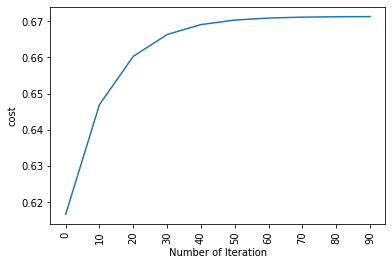

train accuracy 60.26119402985074 %
test accuracy 57.32009925558313 %


In [23]:
logistic_regression(x_train, y_train, x_test, y_test, learning_rate = 0.1, num_iterations = 100)

## Logistic Regression with Sklearn Library

In this chapter, I implemented the logistic regression with sklearn library to dataset. Also, I used GridSearchCV because I observed the result of training and I found out low.<br>

**What is The GridSearchCV?**<br>

GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters. It is basically a cross-validation method. the model and the parameters are required to be fed in. Best parameter values are extracted and then the predictions are made.

In [24]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(-3,3,7),"penalty":["l1","l2"]}

lr = LogisticRegression(random_state=42)

lr.fit(x_train.T,y_train.T)

# It is the result Without GridSearchCV 
print("test accuracy {}".format(lr.score(x_test.T,y_test.T)))
print("Train accuracy {}".format(lr.score(x_train.T, y_train.T)))

lr_gscv=GridSearchCV(lr,grid,cv=10)
lr_gscv.fit(x_train.T,y_train.T)

test accuracy 0.5732009925558312
Train accuracy 0.6038557213930348


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [25]:
# It is the best of gridsearchcv parameters.
print("best hyperparameters: ", lr_gscv.best_params_)
print("accuracy: ", lr_gscv.best_score_)

best hyperparameters:  {'C': 100.0, 'penalty': 'l2'}
accuracy:  0.6069720496894411


In [26]:
# It is the result with GridSearchCV 
log_reg= LogisticRegression(C=100,penalty="l2")
log_reg.fit(x_train.T,y_train.T)

print("test accuracy: {} ".format(log_reg.fit(x_test.T, y_test.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(log_reg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.5880893300248139 
train accuracy: 0.6075870646766169 


# CONCLUSION
I am learning the English language newly if I make an errata please advise me in the comment. Thank you for reading my notebook, your votes and your comments. I will be waiting for your advice.